## Importing Dataset & Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.shape

(5572, 5)

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#remove unwanted columns 
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [7]:
#renaming v1 as Target & v2 as Message
df = df.rename(columns={'v1':'Target', 'v2':'Message'})

In [8]:
#label-encoding target values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target']) 

In [9]:
df

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
#check Nan values
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [11]:
# duplicate values
df.duplicated().sum()

403

In [12]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

## EDA 

In [15]:
!pip install nltk

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshitarya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters'] = df['Message'].apply(len)

/var/folders/j9/yhh_z56x4cj0ncc3j9td1w9m0000gn/T/ipykernel_11171/4016274637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Message'].apply(len)


In [18]:
df

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [19]:
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

/var/folders/j9/yhh_z56x4cj0ncc3j9td1w9m0000gn/T/ipykernel_11171/3690037474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [20]:
df

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [21]:
df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

/var/folders/j9/yhh_z56x4cj0ncc3j9td1w9m0000gn/T/ipykernel_11171/1038490499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [22]:
df.head()

,Target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns 

<Axes: ylabel='Count'>

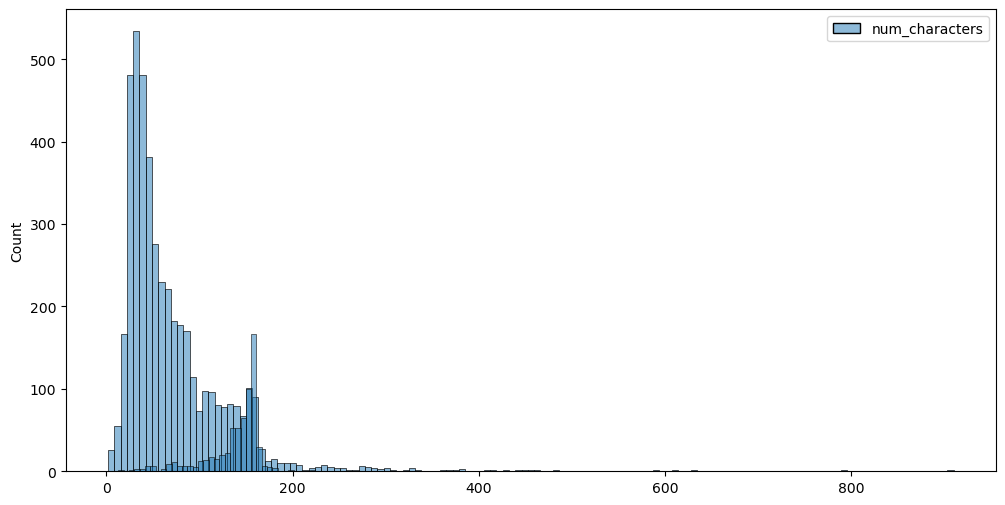

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0][['num_characters']])
sns.histplot(df[df['Target']==1][['num_characters']], color='green')

In [28]:
# Correlation b/w features
df[['Target','num_characters','num_words','num_sentences']].corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

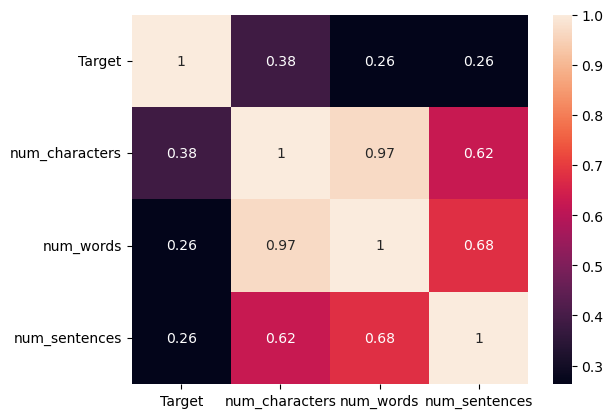

In [29]:
sns.heatmap(df[['Target','num_characters','num_words','num_sentences']].corr(),annot=True)

## Data Pre-Processing

In [30]:
import nltk,string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshitarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def transform_text(text):
    #Lowercase
    text = text.lower()
    #Tokenization
    text = nltk.word_tokenize(text)
    #Removing Special Characters
    y = []
    for i in text:
        if(i.isalnum()):
            y.append(i)
    #Removing Stop Words & Punctuations
    text = y[:]
    y.clear()
    for i in text:
        if(i not in stopwords.words('english') and i not in string.punctuation):
            y.append(i)
    #Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
#sample for processing text
transform_text(df['Message'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [33]:
df['Transformed_Text'] = df['Message'].apply(transform_text)

/var/folders/j9/yhh_z56x4cj0ncc3j9td1w9m0000gn/T/ipykernel_11171/3049882737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_Text'] = df['Message'].apply(transform_text)


In [34]:
df

,Target,Message,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, background_color='white', min_font_size=10)

In [37]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))

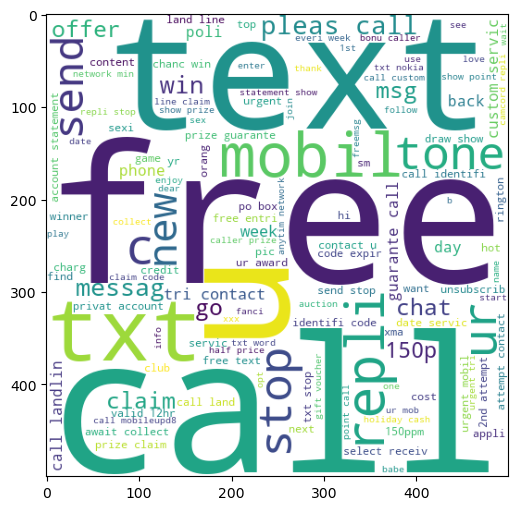

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [39]:
ham_wc = wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))

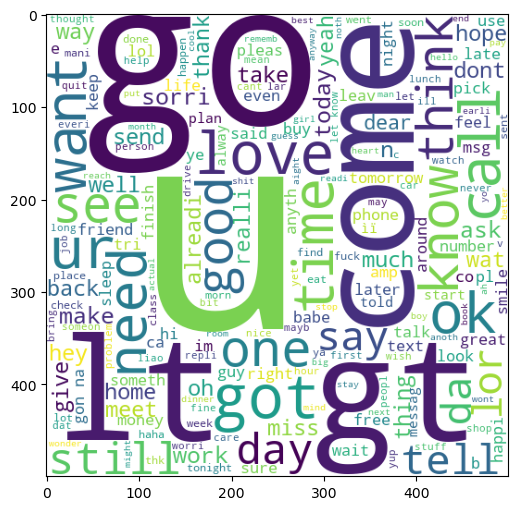

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [41]:
spam_corpus = []
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [42]:
from collections import Counter 
spam_freq = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_freq

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


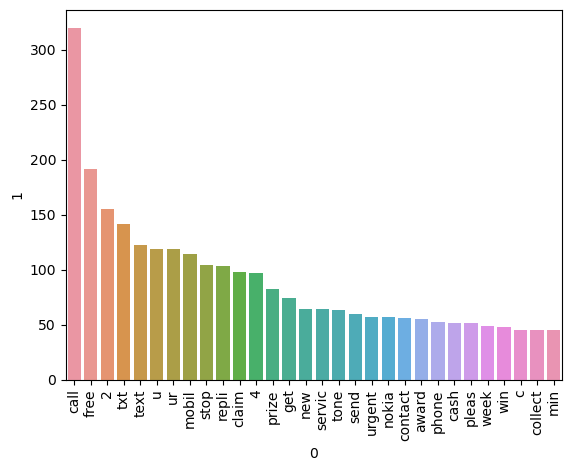

In [43]:
sns.barplot(x = spam_freq[0],y = spam_freq[1])
plt.xticks(rotation=90)
plt.show()

In [44]:
ham_corpus = []
for msg in df[df['Target']==0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
from collections import Counter
ham_freq = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_freq

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


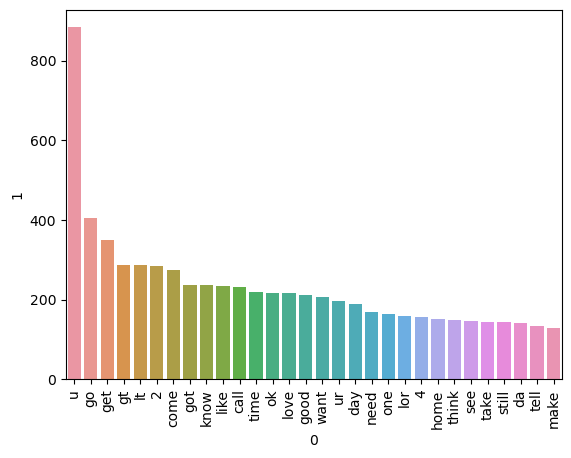

In [46]:
sns.barplot(x = ham_freq[0], y = ham_freq[1])
plt.xticks(rotation=90)
plt.show()

## Model Building

In [47]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Transformed_Text']).toarray()
y = df['Target'].values

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)

BernoulliNB()

In [50]:
y_pred1 = gnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = bnb.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print(confusion_matrix(y_test, y_pred1))
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

[[771 114]
 [ 23 126]]
0.867504835589942
0.525


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

[[885   0]
 [ 33 116]]
0.9680851063829787
1.0


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
print(confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

[[884   1]
 [ 25 124]]
0.9748549323017408
0.992


## Comparing Various Classification Models

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [56]:
#classifiers 
svc = SVC(kernel='rbf', gamma=0.9)
nb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(n_estimators=50, random_state=42)
dtc = DecisionTreeClassifier(max_depth=5,random_state=42)

In [57]:
#dictionary 
clfs= {
    'svc': svc,
    'NaiveBayes': nb,
    'RandomForest':rfc,
    'ExtraTrees':etc,
    'AdaBoost':abc,
    'Bagging': bc,
    'GradientBoost':gbc,
    'KNN':knn,
    'XGBoost':xgb,
    'DecisionTree':dtc
}

In [58]:
#function to compute accuracy & precision of each model
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    return (accuracy,prec)

In [59]:
print(train_classifier(svc, X_train, X_test, y_train, y_test))

(0.9748549323017408, 0.984251968503937)


In [60]:
accuracy_scores = []
precision_scores = []
for model,clf in clfs.items():
    acc,prec = train_classifier(clf, X_train, X_test, y_train, y_test)
    accuracy_scores.append(acc)
    precision_scores.append(prec)

In [61]:
performance_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Precision', ascending=False)

In [62]:
performance_df

,Model,Accuracy,Precision
1,NaiveBayes,0.968085,1.000000
7,KNN,0.905222,1.000000
3,ExtraTrees,0.978723,0.992248
2,RandomForest,0.973888,0.991935
0,svc,0.974855,0.984252
8,XGBoost,0.971954,0.976190
4,AdaBoost,0.968085,0.967742
6,GradientBoost,0.955513,0.963964
5,Bagging,0.960348,0.875000
9,DecisionTree,0.931335,0.854545


In [63]:
#voting classifier to combine effects of top classifiers
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svc',svc),('NaiveBayes',nb),('ExtraTrees',etc)])

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)

In [ ]:
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(nb, open('model.pkl','wb'))